 <h1 style="color:#008000;font-size:35px">  Machine Learning Bank Customer Churn Prediction Project<h1>
    
 # 1) Data Preprocessing 

<h3 style="color:#8B0000;">Imported All the necessary libraries:</h3>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

<h3 style="color:#8B0000;"> Read the Data set and store it in a pandas Data Frame:</h3>

In [2]:
df = pd.read_csv('.\datata/Churn_Modelling.csv')

<h3 style="color:#8B0000;">Pass the Warnings:</h3>

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


<h3 style="color:#8B0000;"> Explore the names of columns in the data frame:</h3>

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

 <h3 style="color:#8B0000;"> How many rows and columns in the data frame :</h3>

In [5]:
df.shape

(10000, 14)

 <h3 style="color:#8B0000;"> General Information About the Columns of the Data  Frame :</h3>
 what are the data types of the column, missing values, and the memory taken by the data set

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h3 style="color:#8B0000;"> What are the data types of the columns in the data frame:</h3>

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<h3 style="color:#8B0000;"> Display the first 10 rows of data frame:</h3>

In [8]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


<h3 style="color:#8B0000;"> Count the missing values in the columns of the data frame:</h3>

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h3 style="color:#8B0000;"> Unique values in  categorical and numeric variable:</h3>

In [10]:
df["Geography"].unique(),df["Gender"].unique(), df.NumOfProducts.unique(), df.HasCrCard.unique(), df.IsActiveMember.unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object),
 array([1, 3, 2, 4], dtype=int64),
 array([1, 0], dtype=int64),
 array([1, 0], dtype=int64))

<h3 style="color:#8B0000;"> Drop the unnecessary columns from data frame:</h3>

In [11]:
df = df.drop(['CustomerId','RowNumber','Surname'], axis = "columns")
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3 style="color:#8B0000;"> General statistic of the data: (count, mean, std, min, q1, q2, q3, max):</h3>


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


<h3 style="color:#8B0000;">  Value counts for Class column(Exited):</h3>


In [13]:
ValueCounts = df['Exited'].value_counts()
print(ValueCounts)

0    7963
1    2037
Name: Exited, dtype: int64


<h3 style="color:#8B0000;">  A bar graph to show the Value counts for Class column(Exited):</h3>

we observe that we have a imbalanced dataset, to handle imbalance data we may need to have resampling.

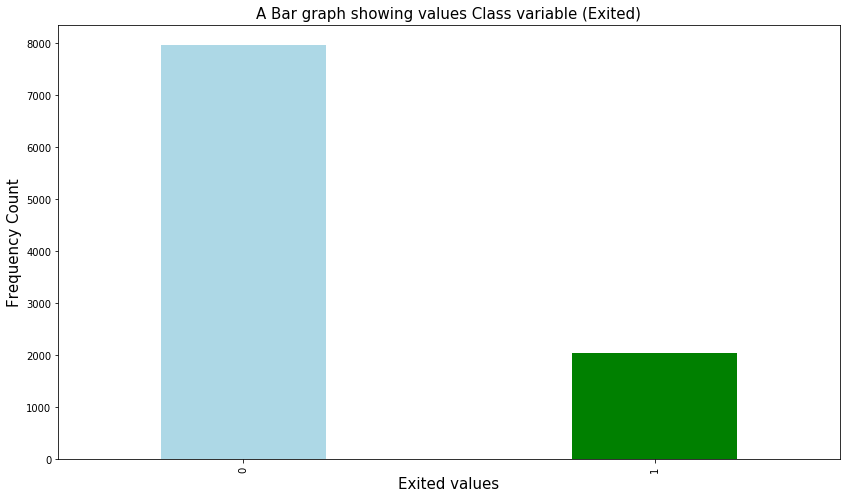

In [14]:
ax = ValueCounts.plot(kind='bar',figsize=(14,8), width=0.40 ,color=['lightblue','green'])
ax.set_xlabel("Exited values",fontsize=15)      
ax.set_ylabel("Frequency Count",fontsize=15)
ax.set_title( 'A Bar graph showing values Class variable (Exited)' ,fontsize = 15)
plt.show()

<h3 style="color:#8B0000;"> Convert the categorical columns to numeric using get dummies:</h3>

In [15]:
df1 = pd.get_dummies(df,columns = ['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<h3 style="color:#8B0000;"> Heat map (Correlation Matrix) before Resampling of imbalanced data:</h3>

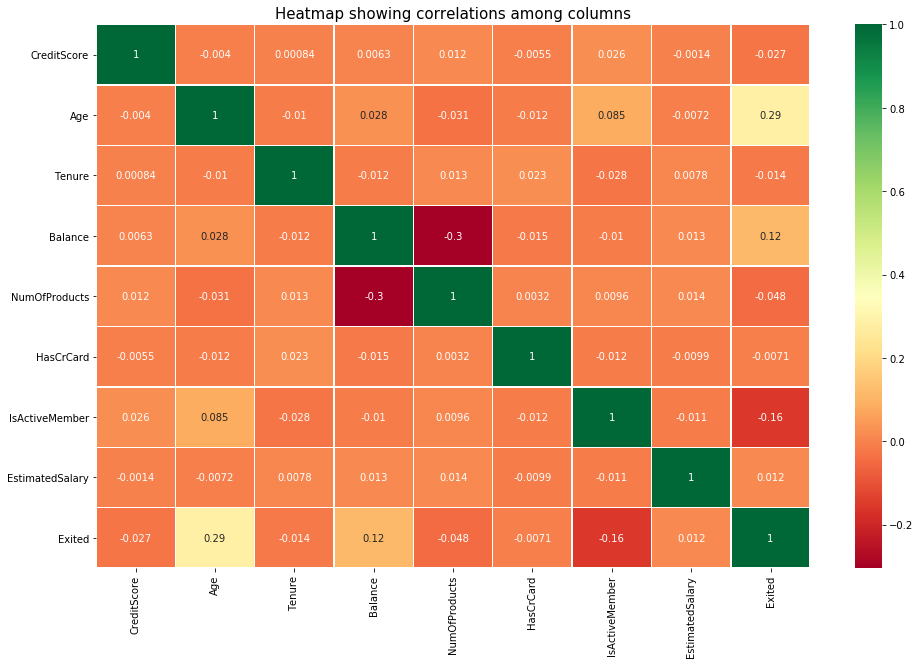

In [16]:
plt.figure(figsize=(16,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="RdYlGn")
plt.title('Heatmap showing correlations among columns',fontsize = 15)
plt.show()

 <h3 style="color:#8B0000;"> Storing Features into "X" matrix and Response Class into "y" vector:</h3>

In [17]:
#Features
X = df1.loc[:,df1.columns != 'Exited']
#Response
y = df1['Exited']  

 <h3 style="color:#8B0000;"> Import SMOTE and fit it on X and y to resample the response classes,Remove under sampling :</h3> 

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X1, y1 = sm.fit_sample(X, y)

Using TensorFlow backend.


<h3 style="color:#8B0000;">  A bar graph to show the Value counts for Exite column After Resampling:</h3>
We can observe that now we have equal number of Exite and non Exite values in the data set.

Text(0, 0.5, 'Frequency Count')

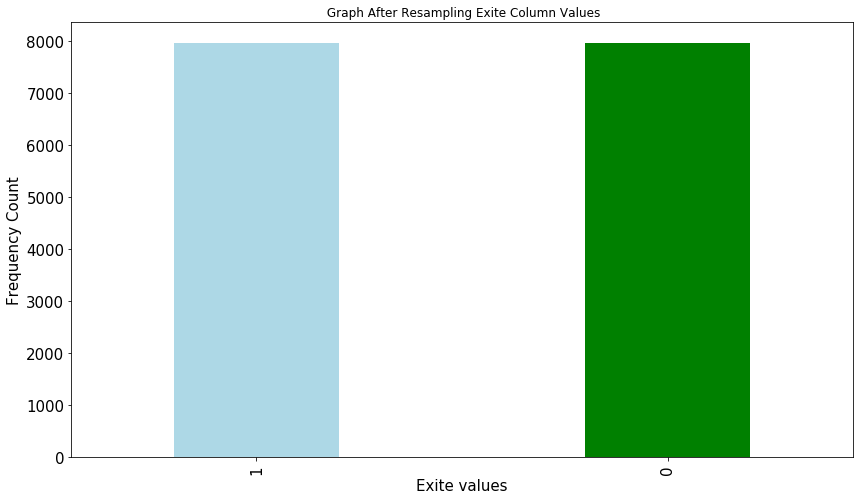

In [19]:
ValueCounts = pd.Series(np.array(y1)).value_counts()

ax = ValueCounts.plot(kind='bar',figsize=(14,8), width=0.40 ,fontsize=15,color=['lightblue','green'], title=' Graph After Resampling Exite Column Values' )
ax.set_xlabel("Exite values",fontsize=15)      
ax.set_ylabel("Frequency Count",fontsize=15)

<h3 style="color:#8B0000;">  Combine Resampled Features and response:</h3>

In [20]:
df2 = pd.concat([pd.DataFrame(X1), pd.Series(y1)], axis=1)
df2.columns = df1.columns
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,1.0,0.0,1
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,1.0,0.0,0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,1.0,0.0,1
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,1.0,0.0,0.0,1.0,0.0,0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,1.0,0.0,0


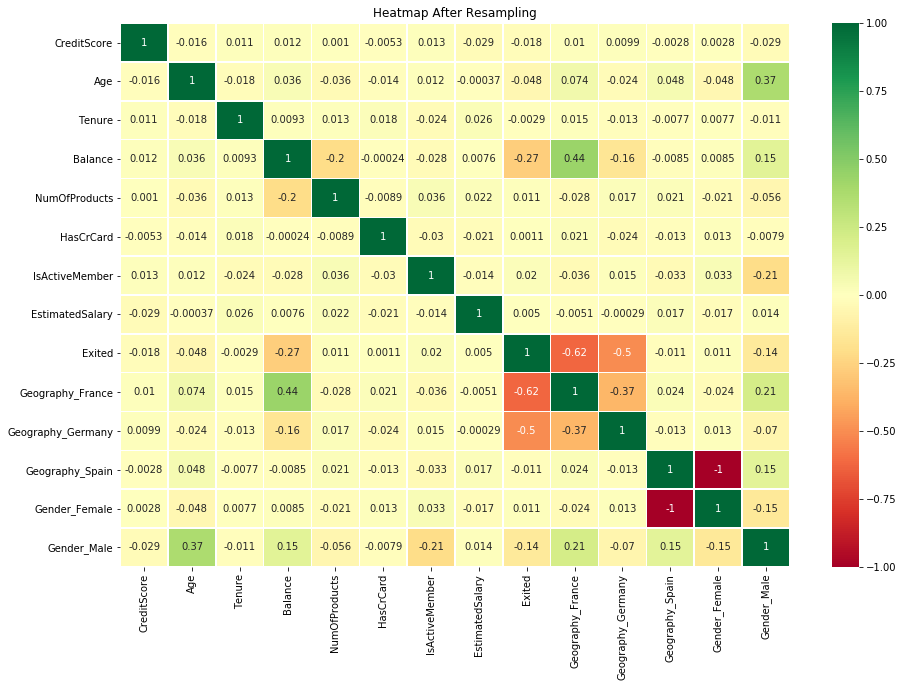

In [21]:
plt.figure(figsize=(15,10))  
sns.heatmap(df2.corr(),annot=True,linewidths=.5, cmap="RdYlGn")
plt.title('Heatmap After Resampling')
plt.show()

# 2) Data Evaluation and Exploratory Data Analysis (EDA)

<h3 style="color:#8B0000;"> Explore the distribution of columns and visualize them: </h3>


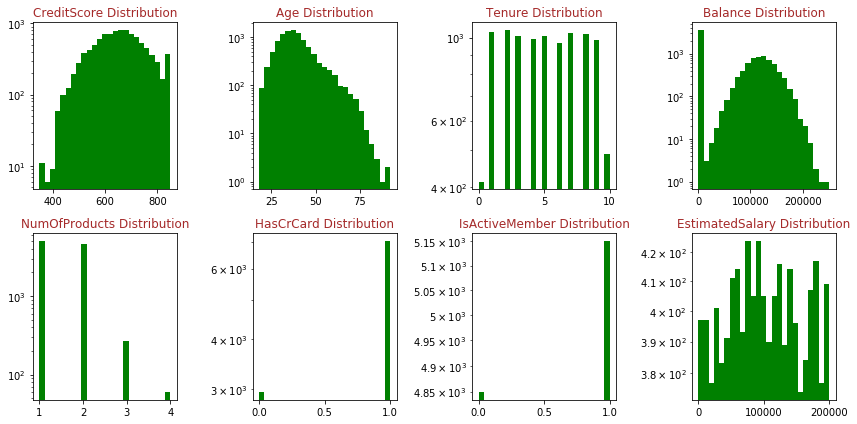

In [22]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
feats = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[feats[i]], bins=25, color='green')
    ax.set_title(str(feats[i])+' Distribution', color='brown')
    ax.set_yscale('log')
plt.tight_layout()



<h3 style="color:#8B0000;"> A Count plot to show the Comparison of Geography and Exited columns :</h3>

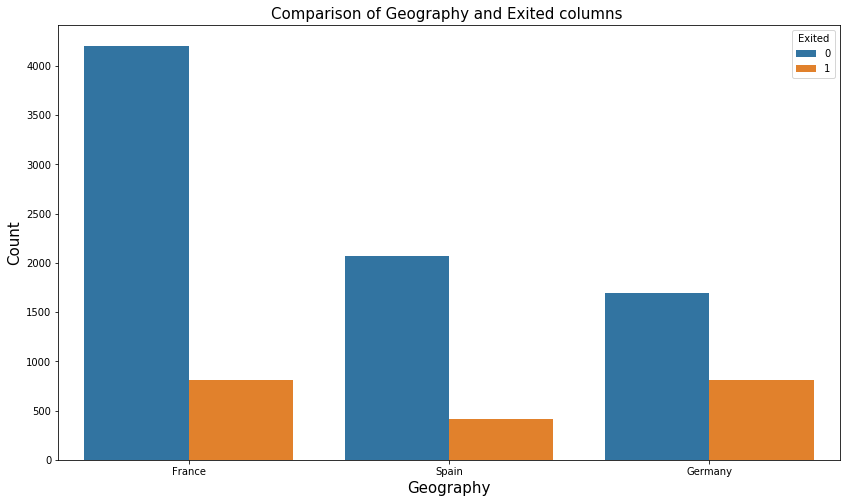

In [23]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Geography", hue="Exited", data=df)
ax.set_xlabel("Geography",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of Geography and Exited columns ',fontsize=15)
plt.show()

<h3 style="color:#8B0000;"> A Count plot to show the Comparison of Gender and Exited columns :</h3>

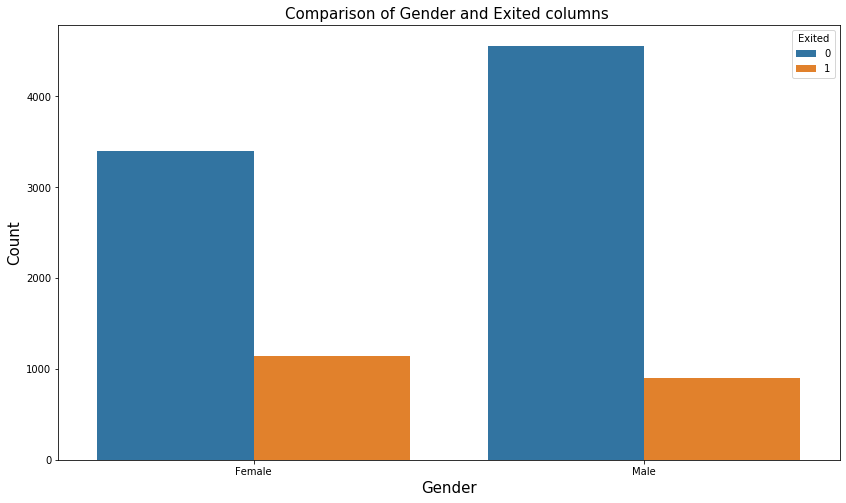

In [24]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Gender", hue="Exited", data=df)
ax.set_xlabel("Gender",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of Gender and Exited columns ',fontsize=15)
plt.show()

<h3 style="color:#8B0000;"> A Count plot to show the Comparison of HasCrCard and Exited columns :</h3>

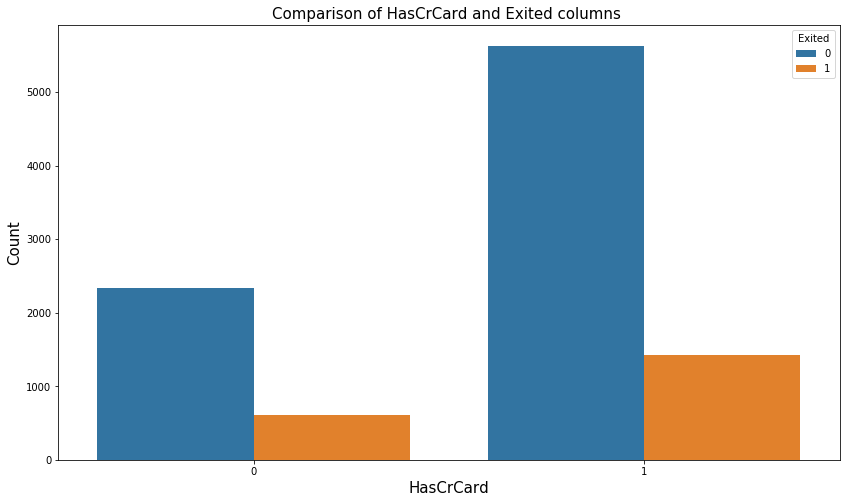

In [25]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="HasCrCard", hue="Exited", data=df)
ax.set_xlabel("HasCrCard",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of HasCrCard and Exited columns ',fontsize=15)
plt.show()

<h3 style="color:#8B0000;"> A Count plot to show the Comparison of NumOfProducts and Exited columns :</h3>

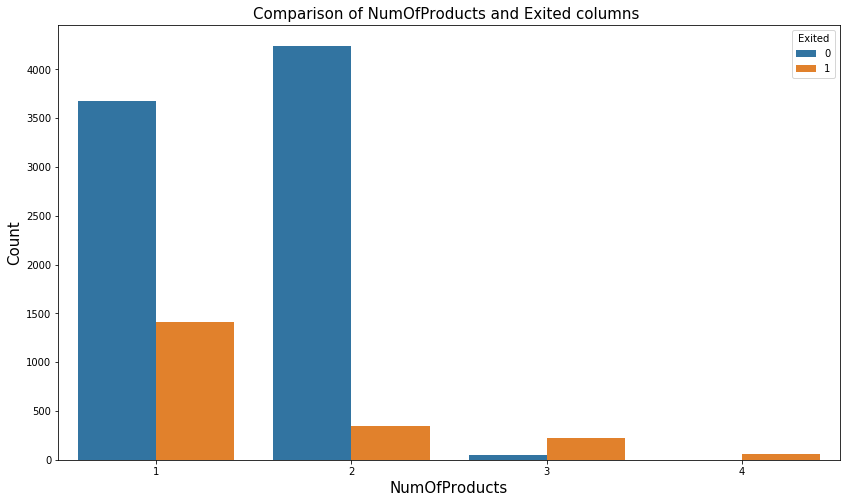

In [26]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="NumOfProducts", hue="Exited", data=df)
ax.set_xlabel("NumOfProducts",fontsize=15)  
ax.set_ylabel("Count",fontsize=15)
ax.set_title('Comparison of NumOfProducts and Exited columns ',fontsize=15)
plt.show()

<h3 style="color:#8B0000;"> A Bar graph showing Exite Rate for each gender :</h3>

In [27]:
Gender_exite_rate = df.groupby('Gender').Exited.mean()
Gender_exite_rate

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

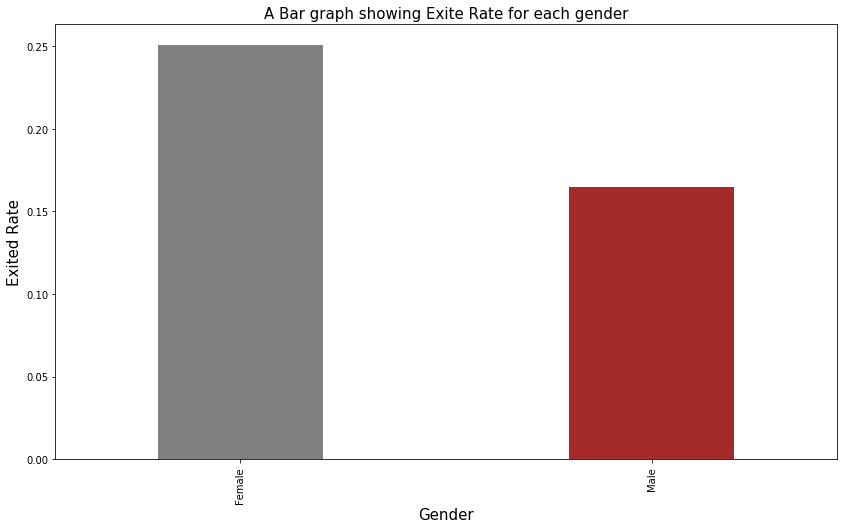

In [28]:
ax = Gender_exite_rate.plot(kind='bar',figsize=(14,8), width=0.40 ,color=['gray','brown'])
ax.set_xlabel("Gender",fontsize=15)      
ax.set_ylabel("Exited Rate",fontsize=15)
ax.set_title( 'A Bar graph showing Exite Rate for each gender' ,fontsize = 15)
plt.show()

<h3 style="color:#8B0000;"> A Bar graph showing Exite Rate for different Tenure :</h3>

In [29]:
Tenure_exite_rate = df.groupby('Tenure').Exited.mean()
Tenure_exite_rate

Tenure
0     0.230024
1     0.224155
2     0.191794
3     0.211100
4     0.205258
5     0.206522
6     0.202689
7     0.172179
8     0.192195
9     0.216463
10    0.206122
Name: Exited, dtype: float64

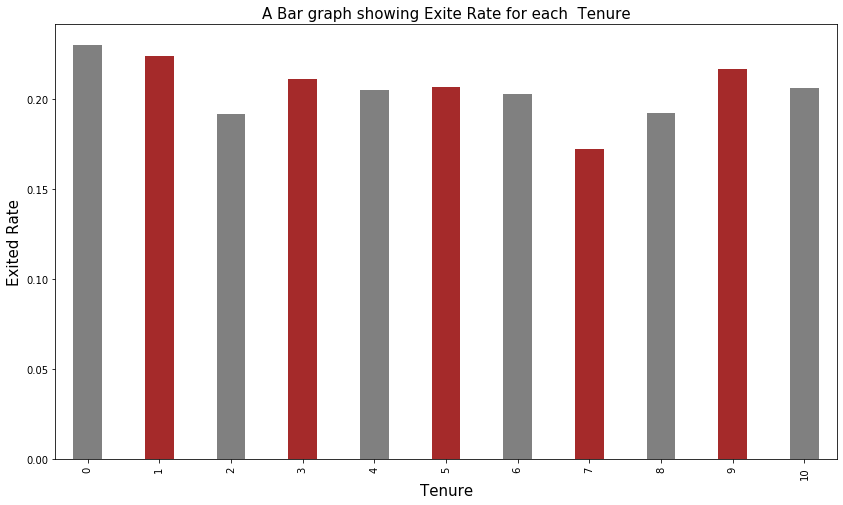

In [30]:
ax = Tenure_exite_rate.plot(kind='bar',figsize=(14,8), width=0.40 ,color=['gray','brown'])
ax.set_xlabel("Tenure",fontsize=15)      
ax.set_ylabel("Exited Rate",fontsize=15)
ax.set_title( 'A Bar graph showing Exite Rate for each  Tenure' ,fontsize = 15)
plt.show()

<h3 style="color:#8B0000;"> A Bar graph showing Exite Rate for different Credit Scores :</h3>

In [31]:
CreditScore_Exite_rate = df.groupby('CreditScore').Exited.mean()
CreditScore_Exite_rate

CreditScore
350    1.000000
351    1.000000
358    1.000000
359    1.000000
363    1.000000
         ...   
846    0.400000
847    0.333333
848    0.000000
849    0.250000
850    0.184549
Name: Exited, Length: 460, dtype: float64

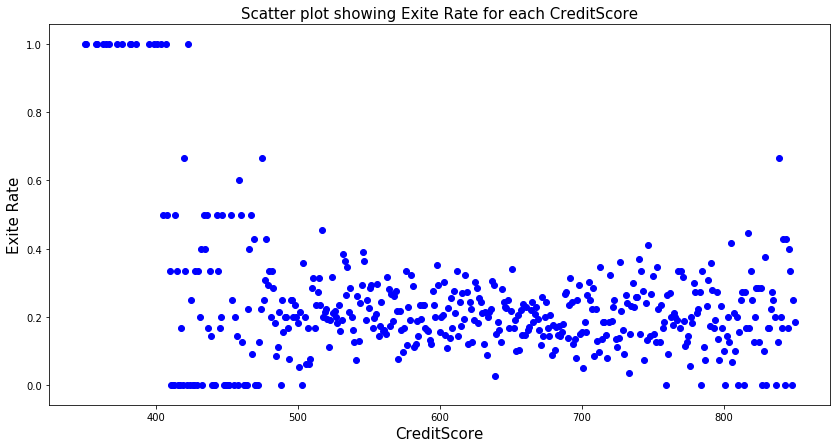

In [32]:
plt.figure(figsize = (14,7))
plt.scatter(x=CreditScore_Exite_rate.index , y= CreditScore_Exite_rate.values,color = 'blue',marker = 'o',)
plt.xlabel('CreditScore',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Scatter plot showing Exite Rate for each CreditScore',fontsize = 15)
plt.show()

<h3 style="color:#8B0000;"> A Bar graph showing Exite Rate for different age range :</h3>

In [33]:
Age_Exite_rate = df.groupby('Age').Exited.mean()
Age_Exite_rate

Age
18    0.090909
19    0.037037
20    0.050000
21    0.056604
22    0.142857
        ...   
83    0.000000
84    0.500000
85    0.000000
88    0.000000
92    0.000000
Name: Exited, Length: 70, dtype: float64

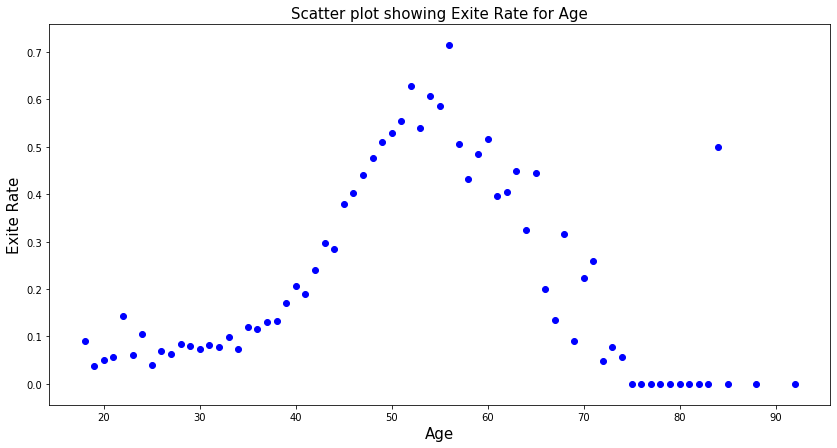

In [34]:
plt.figure(figsize = (14,7))
plt.scatter(x=Age_Exite_rate.index , y= Age_Exite_rate.values,color = 'blue',marker = 'o',)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Exite Rate',fontsize = 15)
plt.title('Scatter plot showing Exite Rate for Age',fontsize = 15)
plt.show()

<h3 style="color:#8B0000;"> General Statistics for the data before modelling:</h3>

In [35]:
df1.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3)  Model Selection

<h3 style="color:#8B0000;">Divide the dataset into train set and test set (80 percent train and 20 percent test):</h3>

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=0)  

<h3 style="color:#8B0000;"> Shapes for  training and testing sets:</h3>

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 13), (3186, 13), (12740,), (3186,))

# Baseline Models:

<h2 style="color:#black">Model 1 : Decision Tree </h2>

<h3 style="color:#8B0000;">Importing DecisionTreeClassifier from tree in sklearn:</h3>

In [38]:
from sklearn.tree import DecisionTreeClassifier

<h3 style="color:#8B0000;"> Build Decision Tree classifier using default parameters :</h3>

In [39]:
Dt_classifier = DecisionTreeClassifier()

<h3 style="color:#8B0000;"> Call 'fit' function of the created  DT model:</h3>

In [40]:
Dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

<h3 style="color:#8B0000;"> Make predictions using test data on Decision Tree model:</h3>

In [41]:
y_pred = Dt_classifier.predict(X_test)

<h3 style="color:#8B0000;">  Accuracy and Confusion matrix of Decision Tree Model:</h3>


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Decision Tree:\n',confusion_matrix(y_test,y_pred))
accu_dt = accuracy_score(y_test,y_pred)
print(' Accuracy Decision Tree:\n',accu_dt,'\n')


Confusion Matrix Decision Tree:
 [[1345  245]
 [ 195 1401]]
 Accuracy Decision Tree:
 0.8618957940991839 



<h2 style="color:#black">Model 2 : Sopport Vector Machine Model: </h2>

<h3 style="color:#8B0000;"> Importing SVC  from sklearn.svm class:</h3>

In [43]:
from sklearn.svm import SVC

<h3 style="color:#8B0000;">Build SVM classifier using  rbf kernal as parameter:</h3>

In [44]:
Svc_classifier = SVC()

<h3 style="color:#8B0000;"> Call 'fit' function of the SVM model to train it:</h3>

In [45]:
Svc_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

<h3 style="color:#8B0000;"> Make predictions using test data on SVM model:</h3>

In [46]:
y_pred = Svc_classifier.predict(X_test)

<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix of SVM  Model:</h3>

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix SVM:\n',confusion_matrix(y_test,y_pred))
accu_svm = accuracy_score(y_test,y_pred)
print(' Accuracy SVM:\n',accu_svm,'\n')


Confusion Matrix SVM:
 [[1590    0]
 [1552   44]]
 Accuracy SVM:
 0.5128688010043942 



<h2 style="color:#black">Model 3 : Random Forest </h2>

<h3 style="color:#8B0000;">Importing RandomForestClassifier from ensemble class in sklearn:</h3>

In [48]:
from sklearn.ensemble import RandomForestClassifier 

<h3 style="color:#8B0000;"> Build RandomForestClassifier using default parameters :</h3>

In [49]:
Rf_classifier = RandomForestClassifier()  

<h3 style="color:#8B0000;"> Train the random forest on training data:</h3>

In [50]:
Rf_classifier.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<h3 style="color:#8B0000;"> Make predictions using test data on  Random forest model:</h3>

In [51]:
y_pred = Rf_classifier.predict(X_test)

<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix of random forest Model:</h3>

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Random Forest:\n',confusion_matrix(y_test,y_pred))
accu_rf = accuracy_score(y_test,y_pred)
print(' Accuracy Random Forest:\n',accu_rf,'\n')


Confusion Matrix Random Forest:
 [[1492   98]
 [ 226 1370]]
 Accuracy Random Forest:
 0.8983050847457628 



<h2 style="color:#black">Model 4 : Logistic Regression </h2>

<h3 style="color:#8B0000;"> Importing LogisticRegression from sklearn linear_model:</h3>

In [53]:
from sklearn.linear_model import LogisticRegression

<h3 style="color:#8B0000;">Build Logistic Regression classifier using default parameters:</h3>

In [54]:
Lg_classifier = LogisticRegression()  

<h3 style="color:#8B0000;"> Call 'fit' function of the created model:</h3>

In [55]:
Lg_classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

<h3 style="color:#8B0000;"> Create predictions by calling 'predict' function of the fitted model:</h3>

In [56]:
y_pred = Lg_classifier.predict(X_test) 
y_pred[0:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix of Logistic Regression Model:</h3>

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Logistic Regression:\n',confusion_matrix(y_test,y_pred))
accu_lg = accuracy_score(y_test,y_pred)
print(' Accuracy Logistic Regression:\n',accu_lg,'\n')


Confusion Matrix Logistic Regression:
 [[1094  496]
 [ 440 1156]]
 Accuracy Logistic Regression:
 0.7062146892655368 



<h2 style="color:#black">Model 5 : K-Nearest Neighbor Model </h2>

<h3 style="color:#8B0000;"> Importing KNeighborsClassifier from sklearn neighbors class:</h3>

In [58]:
from sklearn.neighbors import KNeighborsClassifier

<h3 style="color:#8B0000;">Build KNeighborsClassifier using n_neighbors = 5 parameter:</h3>

In [59]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

<h3 style="color:#8B0000;"> Call 'fit' function of the created KNN model:</h3>

In [60]:
knn_classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

<h3 style="color:#8B0000;"> Make predictions by calling 'predict' function of the fitted KNN model:</h3>

In [61]:
y_pred = knn_classifier.predict(X_test) 

<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix of KNN Model:</h3>

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix KNN Model:\n',confusion_matrix(y_test,y_pred))
accu_knn = accuracy_score(y_test,y_pred)
print(' Accuracy KNN Model:\n',accu_knn,'\n')


Confusion Matrix KNN Model:
 [[ 952  638]
 [ 379 1217]]
 Accuracy KNN Model:
 0.6807909604519774 



<h2 style="color:#black">Model 6 : Naive Bayes Model: </h2>

<h3 style="color:#8B0000;"> Importing GaussianNB from sklearn naive_bayes class:</h3>

In [63]:
from sklearn.naive_bayes import GaussianNB

<h3 style="color:#8B0000;">Build GaussianNB using default parameters:</h3>

In [64]:
NB_classifier = GaussianNB()

<h3 style="color:#8B0000;"> Call 'fit' function of the created Naive bayes model:</h3>

In [65]:
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

<h3 style="color:#8B0000;"> Make predictions by calling 'predict' function of the fitted Naive Bayes model:</h3>

In [66]:
y_pred = NB_classifier.predict(X_test) 

<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix of NaiveBayes Model:</h3>

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Naive Bayes:\n',confusion_matrix(y_test,y_pred))
accu_nb = accuracy_score(y_test,y_pred)
print(' Accuracy Naive Bayes Model:\n',accu_nb,'\n')


Confusion Matrix Naive Bayes:
 [[1069  521]
 [ 361 1235]]
 Accuracy Naive Bayes Model:
 0.7231638418079096 



<h3 style="color:#8B0000;"> Comparing different machine learning models (model selection) in terms of accuracy:</h3>

Text(0, 0.5, 'Accuracy')

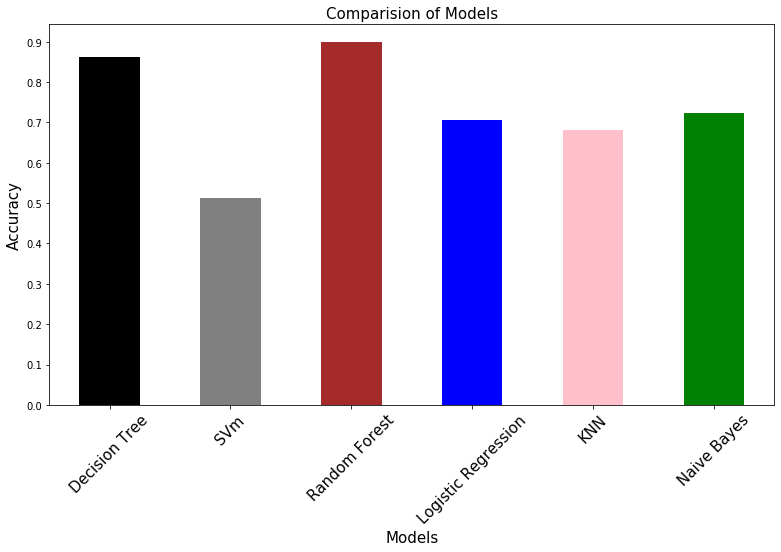

In [68]:
results = pd.Series([accu_dt , accu_svm, accu_rf, accu_lg, accu_knn, accu_nb  ])
names = ['Decision Tree','SVm','Random Forest','Logistic Regression','KNN','Naive Bayes']

ax = results.plot(kind = 'bar',figsize=(13,7),color=['black','gray','brown','blue','pink','green'])
ax.set_title('Comparision of Models',fontsize=15)
ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
ax.set_xticklabels(names ,fontsize=15,rotation = 45)
ax.set_xlabel("Models",fontsize=15)
ax.set_ylabel("Accuracy",fontsize=15)

### From the above comparison we see that Random Forest gave the highest Performance in terms of accuracy hence we select Random Forest Model as our selecton.

# 4) Model Evaluation

<h3 style="color:#8B0000;"> Train & Evaluate Chosen Model:</h3>
 Fit the selected model (Random Forest in this case) on the training dataset and evaluate the results.

In [69]:
Selected_classifier = RandomForestClassifier(random_state = 0)
Selected_classifier.fit(X_train, y_train)
# Predict the Test set results
y_pred = Selected_classifier.predict(X_test)
#Evaluate Model Results on Test Set:
from sklearn.metrics import precision_score,recall_score,f1_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, ]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score',])
print (results)

           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.896422   0.928281  0.859649  0.892648


<h3 style="color:#8B0000;"> k-Fold Cross-Validation for Random Forest:</h3>

In [70]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = Selected_classifier, X = X_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(),  accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.90 (+/- 0.01)


### Therefore, our k-fold Cross Validation results indicate that we would have an accuracy anywhere between 89% to 91% while running this model on any test set.

<h3 style="color:#8B0000;"> Evaluate with Confusion Matrix:</h3>

In [71]:
cm = confusion_matrix(y_test,y_pred)
print(cm) 

[[1484  106]
 [ 224 1372]]


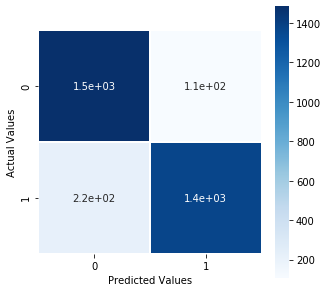

In [72]:
plt.figure(figsize=(5,5))
sns.heatmap(data=cm, linewidths=.5,annot=True,square=True, cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### We have got an accuracy of 90%; signalling the characteristics of a reasonably good model.

# 5) Model Improvement

<h3 style="color:#8B0000;"> Prepare the grid values for GridSearchCV for Random Forest Classifier:</h3>

In [73]:
# input different # of trees n_estimators for random forrest to GridSearchCV
grid_values = {'n_estimators': [5, 10,15,20,25,30,35,40,45,50,55,60],
# input two different criterion'gini','entropy' for random forrest to GridSearchCV               
               'criterion':['gini','entropy'], 
# input different # of  min_samples_split for random forrest to GridSearchCV               
               'min_samples_split': [1e-20, 5e-20, 1e-10, 5e-10, 1e-5, 5e-5, 1e-2, 5e-2],
              }
#INitializing GridSearchCV using Random forrest Classifier, CV=5 and roc_auc as metrics
Grid_classifier_rf = GridSearchCV(Selected_classifier,grid_values,cv=10, scoring='accuracy')

<h3 style="color:#8B0000;"> Fit the Grid_classifier_rf with features and responses:</h3>

In [74]:
Grid_classifier_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'crit

<h3 style="color:#8B0000;"> The best parameters given by GridSearchCV on Random Forest Model: </h3>

In [75]:
Grid_classifier_rf.best_params_

{'criterion': 'gini', 'min_samples_split': 1e-20, 'n_estimators': 55}

<h3 style="color:#8B0000;"> The best accuracy score given by GridSearchCV on Random Forest Model: </h3>

In [76]:
Grid_classifier_rf.best_score_

0.9097331240188383

<h3 style="color:#8B0000;"> The best estimator given by GridSearchCV : </h3>

In [77]:
Grid_classifier_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1e-20,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<h3 style="color:#8B0000;"> Build the Random Forest model again with the best parameters given by GridSearchCV (tuned model): </h3>

In [78]:
Tuned_classifier = RandomForestClassifier(criterion  = 'gini', min_samples_split = 1e-20, n_estimators =  55)

<h3 style="color:#8B0000;"> Fit the model with best parameters: </h3>

In [79]:
Tuned_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=1e-20,
                       min_weight_fraction_leaf=0.0, n_estimators=55,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# 6)  Future Predictions

<h3 style="color:#8B0000;"> Make predictions on test data and show first 60 predicted values: </h3>

In [80]:
y_pred = Tuned_classifier.predict(X_test)
y_pred[0:60]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0], dtype=int64)

<h3 style="color:#8B0000;"> Compare the true values and predicted values of Exited column for tuned model: </h3>

In [81]:
df_comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_comp.head(20)  

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,0,0
7,1,1
8,1,0
9,0,0


<h3 style="color:#8B0000;">  Accuracy  and Confusion matrix for Tuned Random Forest Model:</h3>

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Confusion Matrix Tuned Random Forest:\n',confusion_matrix(y_test,y_pred))
tuned_accu = accuracy_score(y_test,y_pred)
print(' Accuracy Tuned Random Forest:\n',tuned_accu,'\n')


Confusion Matrix Tuned Random Forest:
 [[1489  101]
 [ 196 1400]]
 Accuracy Tuned Random Forest:
 0.9067796610169492 



# 7) Model Deployment

Deploy the model to a server using ‘joblib’ library so that we can productionize the end-to-end machine learning framework. Later we can run the model over any new dataset to predict the probability of any customer to churn in months to come.

In [ ]:
# pip install joblib 
#to install the package
filename = 'final_model.model'
i = [Tuned_classifier]
joblib.dump(i,filename)